In [1]:
# Run this first!!!

from __future__ import division
import math

import sys
sys.path.append('../experimental')
import clash_analysis
import bonferroni
sys.path.append('../common')
import util
import common_probs

# Case 3 of First Moment Method

## Simulations to Check Direction

In the last notebook I was trying to get the final case (where there was overlap by more than $k/2$) to converge to 0. However, does the upper bound I was looking at even converge to 0?

In [20]:
def get_term(k, t, a):
    d = math.floor(k / t)
    exponent = t * math.floor((d + 1) / 2)
    return common_probs.get_c2(a) ** exponent

def get_summation(k, a):
    total = 0
    upper = int(k / 2 - 1) if k % 2 == 0 else int(math.floor(k / 2))
    for t in range(1, upper + 1):
        total += get_term(k, t, a)
    return total

def get_trend_func(a):
    return lambda k: get_summation(k, a)

def plot_trend(alph_sizes, k_upper):
    func_map = {get_trend_func(a): 'Alphabet size %d' % a for a in alph_sizes}
    util.plot_many(range(1, k_upper), func_map)

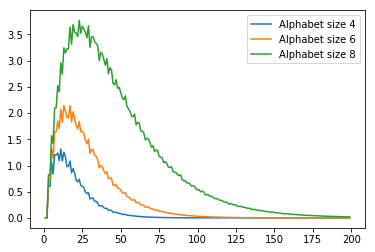

In [22]:
# The alphabet sizes to test.
ALPH_SIZES = [4, 6, 8]
# The upper bound for k
K_UPPER = 200

plot_trend(ALPH_SIZES, K_UPPER)

From this it seems like this upper bound does indeed go to 0. Therefore I will continue to try to prove it.

## Proof for Case 3

Recall that we are trying to show that the following sum goes to 0 where $t$ is the number of terms in the substring that doesn't overlap, $d = k \textrm{ div } t$, and $r$ is the remainder of this division.

$$
\sum_{0 < t < k/2} c_2^{r \lfloor \frac{d + 2}{2} \rfloor + (t - r) \lfloor \frac{d + 1}{2} \rfloor} 
$$

In the last notebook I was able to show that...

$$
\leq \sum_{0 < t < k/2} c_2^{t \lfloor \frac{d + 1}{2} \rfloor}
$$

Note that for that each term of the summation we have...

$$
c_2^{t \lfloor \frac{d + 1}{2} \rfloor} \leq c_2^{t \left(\frac{d + 1}{2} - \frac{1}{2}\right)} = c_2^{\frac{t}{2} d} = c_2^{\frac{t}{2} \lfloor \frac{k}{t} \rfloor} = c_2^{\frac{t}{2} \left(\frac{k}{t} - \frac{t - 1}{t}\right)} = c_2^{\frac{k}{2} - \frac{t}{2} + \frac{1}{2}}
$$

From this we see that...

$$
\sum_{0 < t < k/2} c_2^{t \lfloor \frac{d + 1}{2} \rfloor} \leq \sum_{0 < t < k/2} c_2^{\frac{k}{2} - \frac{t}{2} + \frac{1}{2}} \leq \left(\frac{k}{2}\right) c_2^{\frac{k}{2} - \frac{k}{4} + \frac{1}{2}} = \mathcal{O}\left(k c_2^\frac{k}{4}\right)
$$

Plugging in $k = (1 + \varepsilon) log_{1/c_2}(n)$...

$$
= \mathcal{O} \left(\frac{log(n)}{n^{\frac{1 + \varepsilon}{4}}}\right) \rightarrow 0
$$

## Proof of Lemma

Now all that is left for this proof is proving the lemma that $c_2^2 \leq c_{1, 2}$ for all integer values of $a \geq 1$. In other words that...

$$
\left(\frac{4^a - 3^a}{(2^a - 1)^2}\right)^2 \leq \frac{8^a - (2)6^a + 5^a}{(2^a - 1)^3}
$$

This can be manipulated to...

$$
\left(4^a - 3^a\right)^2 \leq 2^a \left(8^a - (2)6^a + 5^a\right) - \left(8^a - (2)6^a + 5^a\right)
$$

Expanding this out and rearranging...

$$
0 \leq (10^a - 9^a) - (8^a - 6^a) + (6^a - 5^a) 
$$

Since this does not seem easy to prove on its own, a lower bound is found which can be proved more easily.

$$
(10^a - 9^a) - (8^a - 6^a) + (6^a - 5^a) \geq (10^a - 9^a) - (9^a + 5^a) + (6^a - 5^a) = (10^a - (2) 9^a) + (6^a - (2)5^a)
$$

Consider the function $f(x,a) = (x + 1)^a - (2)x^a$. The above can then be rewritten as

$$
f(9, a) + f(5, a)
$$

Intuitively we would think that for some fixed value of $x \in \mathcal{N}$ at a certain value of $a$, $f(x, a)$ becomes non-negative. At that specific value of $a$ for $f(9, a) + f(5, a)$ it certainly becomes true that this quantity is non-negative, implying that the inequality holds. For the remaining values of $a$, we can just check via computation.

Note that for a fixed $x \in \mathcal{N}$ (not including 0), $f(x, a) \geq 0$ is equivalent to...

$$
(x + 1)^a - 2x^a \geq 0 \implies a log(x + 1) \geq log2 + a logx \implies a \geq \frac{log2}{log\left(\frac{x+1}{x}\right)}
$$

Thus when $x = 9$ this means $a \geq 6.5788...$ and when $x = 5$ this means that $a \geq 3.8017...$. Therefore, I check to make sure that the inequality holds for the first 6 values of $a$. Once this has been shown, the rest of the possible values of $a$ hold from the above, proving the inequality.

In [5]:
def check_vals(a_vals):
    print 'Alph', 'Value'
    for a in a_vals:
        computed = 10 ** a - 9 ** a - 8 ** a + 2 * 6 ** a - 5 ** a
        print a, '\t', computed

In [6]:
# Values of a to check
A_VALS = range(1, 7)

check_vals(A_VALS)

Alph Value
1 	0
2 	2
3 	66
4 	1310
5 	20610
6 	284102


## Does this look right?

Assuming that my work is correct, as $n \rightarrow \infty$ then any prefix of length $k = (1 + \varepsilon) log_{1/c_2}(n)$ should have probability 0 of occuring elsewhere in the string. As a result, we would expect the mean size of levels in the automaton to stabalize around $k = log_{1/c_2}(n)$.

In [2]:
def plot_level_sizes(alph_sizes, string_lengths, trials):
    # Plot for every alphabet size.
    for alph_size in alph_sizes:
        for n in string_lengths:
            threshold = math.log(n) / math.log(1 / common_probs.get_c2(alph_size))
            # Plot the average level trend and the threhsold value.
            alph = clash_analysis.create_alphabet(alph_size)
            clash_analysis.plot_lvlsize_trend(trials, n, alph, threshold, window=(0, 2 * threshold))

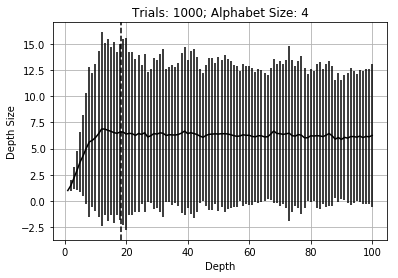

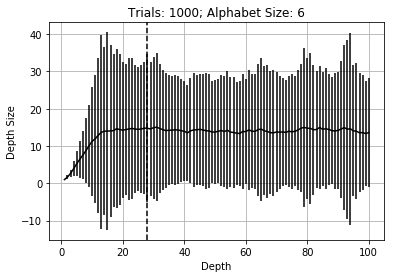

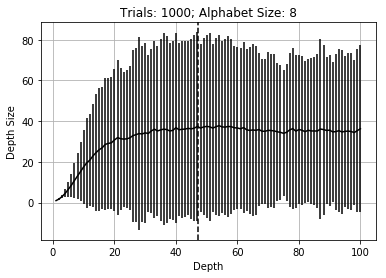

In [8]:
# Constants
STRING_LENGTHS = [100]
ALPH_SIZES = [4, 6, 8]
NUM_TRIALS = 1000

plot_level_sizes(ALPH_SIZES, STRING_LENGTHS, NUM_TRIALS)

Seems like some of these are overestimates; however, this does not disprove my findings since the probability below this could still be very small which forces the curve to level off. The threshold may get more pronounced as the string length increases.

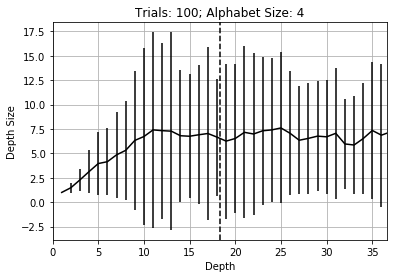

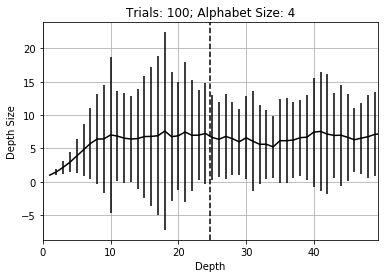

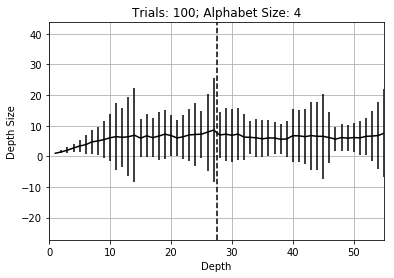

In [4]:
# Constants
STRING_LENGTHS = [100, 500, 1000]
ALPH_SIZES = [4]
NUM_TRIALS = 100

plot_level_sizes(ALPH_SIZES, STRING_LENGTHS, NUM_TRIALS)

This is really too hard to tell... I will have to think of a better way to test later.